In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [4]:
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# create model
model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# Fit the model
Model = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1386 - acc: 0.9619 - val_loss: 0.1436 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1365 - acc: 0.9628 - val_loss: 0.1414 - val_acc: 0.9590
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1345 - acc: 0.9634 - val_loss: 0.1400 - val_acc: 0.9591
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1325 - acc: 0.9636 - val_loss: 0.1383 - val_acc: 0.9606
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1305 - acc: 0.9644 - val_loss: 0.1365 - val_acc: 0.9605
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1287 - acc: 0.9649 - val_loss: 0.1352 - val_acc: 0.9610
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1269 - acc: 0.9654 - val_loss: 0.1334 - v

Total loss: 0.117159377512
Accuracy of the test datset: 96.57


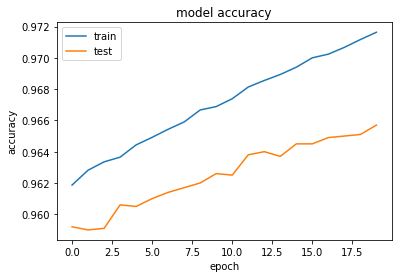

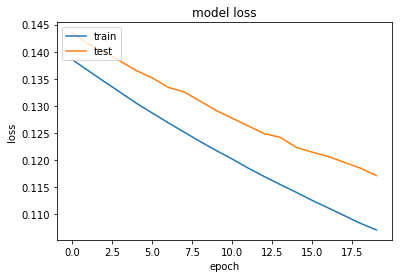

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Total loss:', score[0])
print('Accuracy of the test datset:', score[1]*100)

plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()